Clustering is a type of unsupervised learning. 

This is very often used when you don’t have labeled data. 

k-means clustering is one of the popular clustering algorithm. 

The goal of this algorithm is to find groups (clusters) in the given data. 

In [1]:
k=6 #the number of clusters in our data

from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=k*1000, centers=k, n_features=2) #, random_state=10)

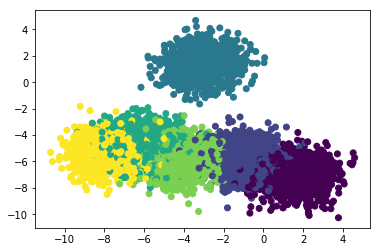

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Our algorithm works as follows, assuming we have inputs $x_1,x_2,x_3,…,x_n$ and value of $k$.

- Pick $k$ random points as cluster centers called centroids.

- Assign each $x_i$ to nearest cluster by calculating its distance to each centroid.

- Find new cluster center by taking the average of the assigned points.

- Repeat Step 2 and 3 until none of the cluster assignments change.

In [3]:
#make k (=3) random centroids

import numpy as np

MAX = 10
MIN = -10

C = (MAX - MIN) * np.random.random_sample((k,2)) + MIN

print(C)

[[-2.72493898  0.07085744]
 [-5.10091655 -0.89213218]
 [ 7.0994009   0.34169426]
 [ 3.3394514  -3.59120243]
 [ 7.58535385  3.56382187]
 [-8.46927298 -9.5251741 ]]


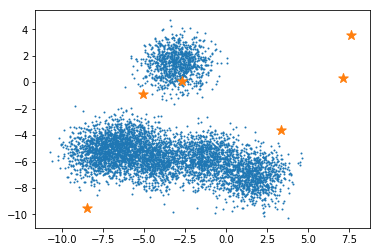

In [4]:
plt.scatter(X[:,0], X[:,1], s=1)
plt.scatter(C[:,0], C[:,1], marker='*', s=100)
plt.show()

In [5]:
from copy import deepcopy


C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = np.linalg.norm(C - C_old, None)
#print("first error:",error)
#print("first C",C)
while error != 0:
    for i in range(len(X)):
        distances = np.linalg.norm(X[i]-C, axis=1)
        cluster = np.argmin(distances)
        clusters[i] = cluster        
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points)>0:
            C[i] = np.mean(points, axis=0)
        #print(points)
        #if np.any(np.isnan(C[i])):
            #print(points)
        #print("C[i]",C[i])
    error = np.linalg.norm(C-C_old)
    #print("C",C)
    ##print("C_old",C_old)
    #print("error",error)

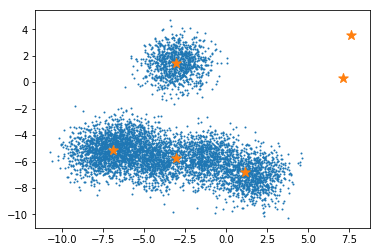

In [6]:
plt.scatter(X[:,0], X[:,1], s=1)
plt.scatter(C[:,0], C[:,1], marker='*', s=100)

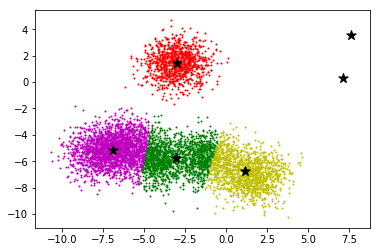

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        #print(i)
        #print(colors[i])
        #print(points)
        if len(points)>0:
            ax.scatter(points[:, 0], points[:, 1], s=1, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='#000000')